# Multi-Object Tracking using Kalman Filters and the Hungarian Algorithm

<br>
<font size="4">
    $\bf{Group Members}$ <br><br>
    Ayush Saran : 181EE114<br>
    Nikhil Nair : 181EE131<br>
    Manav Singhal: 181EE157 <br>
    Suraj Kulkarni :181EE248<br>
</font>

# What is a Kalman Filter ?

<font size="4">It is an iterative mathematical process that uses a set of equations and consecutive data inputs to quickly <br>estimate the true value, position ,velocity ,etc of a the object being measured, when the measurements contain <br>unprecedented or random error , uncertainity or variation

The general use of Kalman filters are usually for things that require smoothing of noisy measurement data and estimation.

Global Positioning Systems , Laptop Trackpads , trajectory optimization in robotics applications involving control and motion planning.

The most famous early use of the Kalman filter was in the Apollo navigation computer
that took Neil Armstrong to the moon, and (most importantly) brought him back. Today, Kalman filters are at work
in every satellite navigation device, every smart phone, and many computer games.</font>

# Understanding the Kalman Filter ?

<font size="4">The very first tenet that is considered in the usage of a Kalman filter in a system is that there is error in both the prediction and measurement of a system variable that we are concerned with.

The Kalman filter will be dealt with in the context of tracking the position of a certain object.

A 1-D Kalman Filter to track an object moving along the x-axis will be implemented in order to gain an understanding.

Assume a car moving along a road with it's position being measured and estimated. 

In Kalman filters μ and σ2 representing a Gaussian distibution is taken as the best estimate for representing the probality distribution for the measured and estimated position of the car along the x-axis .

In dealing with a Gaussian distribution it is clear that a distribution with a lower variance and hence narrower distribution is preferred as it imbues it with more certainty.

The Kalman filter represents all distributions by Gaussians and has two major iterative steps: Update and Predict.
</font>
![](1.png)

# Update 

<br>

<font size="4">
Simply put the Update step takes in the predicted postion of the car in terms of the mean ,$\nu$ and variance ,$r^2$ of the Gaussian distribution representing it and updates the position based on the measured position represnted by it's mean,$\mu$ and variance,$\sigma^2$
    
The intuition behind the update is that the mean needs to be weighted by the reciprocal of the variance. As a lower variance hints at higher confidence in the position.
    
The variance needs to be updated based on the harmonic sum of the two variances as intuitively it makes more sense for the distribution to get peakier as there is more information about the system and hence allowing for a more certain estimate of the position.
    
    
$$\mu^{'} = \frac{\mu r^2 + \nu\sigma^2}{r^2 + \sigma^2}$$
$$\sigma^{'} = \frac{1}{\frac{1}{r^2}+\frac{1}{\sigma^2}} $$    
    
</font>


In [1]:
def update(mean1, var1, mean2, var2):
    
    new_mean= (mean1*var2+mean2*var1)/(var1+var2)
    new_var = 1/(1/var1 +1/var2)
    return [new_mean,new_var]



# Predict
<br>
<font size="4">

The predict step is straightforward. When the car moves it's new mean and variance will be same as the measurement but we also need to add in the the uncertainity of the motion which is ($u$ , $r^2$).
    
$$\mu^{'} = \mu+u$$
$$\sigma^{'} = \sigma^2 + r^2 $$    
    
</font>


In [2]:
def predict(mean1, var1, mean2, var2):
    
    new_mean= mean1 +mean2
    new_var = var1 +var2
    return [new_mean,new_var]


# A Simple Kalman Filter 

<br>
<font size="4">
    
A simple Kalman filter is just these two steps performed for the set of measurements of $x$ and $\dot{x}. $ 
    
</font>

In [3]:
measurements =[5, 6, 7, 9, 10]
motion = [1 ,1 , 2, 1, 1]
measurement_sig = 4
motion_sig =2 
mu = 0 
sig = 1000

for i in range(5):
    mu,sig=update(mu,sig,measurements[i],measurement_sig)
    mu,sig=predict(mu,sig,motion[i],motion_sig)
    print([mu, sig])

[5.9800796812749, 5.98406374501992]
[6.992019154030327, 4.397446129289705]
[8.996198441360958, 4.094658810112146]
[9.99812144836331, 4.023387967876767]
[10.99906346214631, 4.005829948139216]


# A more General Approach 

<br>
<font size="4">
Now that a general intuition for what a Kalman Filter does is established, the 1-D Filter can be revisited with a more general design.
     </font>
     
## State Updation 
<br>

<font size="4">
The Kalman filter model assumes that the state of a system at a time $t$ evolved from the previous state at time $t-1$ according to the equation.


$$ X_t = A_t X_{t-1} + Bu_t + w_t$$
    
Where ,<br>
   * $\bf{X_t}$ : State Vector and in our car example the [ position ; velocity ] vector.<br>
    
   * $\bf{A_t} $: The State Transition Matrix. It's defines how the current state depends on the previous. In the case of<br>           the car example it is dictated by the kinematics of the system. <br>
    
   * $\bf{u_t}$ : The Vector holding the control inputs. For the car it could be the braking, steering,etc<br>
    
   * $\bf{B_t}$ : The Control Input matrix that maps the control input to the coresponding State Vector <br>represntation.
   * $\bf{w_t}$ : Process noise with a covariance Q. 


</font>

## System Measurements 
<font size="4">

$$ Y_t = H_tX_t + \nu_t$$
    
Where ,<br>
   * $\bf{Y_t}$ : Vector of measurements <br>
    
   * $\bf{H_t} $: Matrix that maos $X_t$ to measurement space<br>          
    
   * $\bf{\nu_t}$ :  Measurement Noise with a covariance R <br>
    
Note : $\textbf{w}_k and \textbf{v}_k$ represent the process noise vector with the covariance Q and the measurement noise vector with the covariance R, respectively. They are assumed statistically independent Gaussian noise with the normal probability distribution.
    $$p(w) = N(0,Q)$$
    $$p(\nu)=N(0,R)$$
    
</font>

# Kalman Filter Equations 

![](3.png)
<br>
<font size="4">
The equations are divided into: <br> 
    
* $\bf{Predictor}$ $ \bf{Equations }$ : To find the current state using the previous state. <br><br>
    
* $\bf{Corrector}$ $  \bf{Equations}$ : To improve the curent estimated state by incorporating a new measurement into the model

</font>

# Predictor Equations 

<br>
<font size="4">

The state is predicted as follows using the Dynamic(Kinematic) modelling of the system disregarding the noise

$$ X_t = A_t X_{t-1} + Bu_t $$

Now the error covariance matrix  is given by 
    $$P_k = E[(X^{true}_t -X_t)(X^{true}_t -X_t)^T]$$
    
$$  {P}_k = A {P}_{k-1}A^T+ {Q} $$

For an object whose postion on the x-axis varies as:
    $$X(t)= 3t - 0.75t^2$$
    
The equation for updating $X_t$ would look like 
    $$ X_t = X_{t-1} + \dot{X_{t-1}}\Delta t + \frac{1}{2}\dot{\dot{X_t}}{\Delta t}^2$$
    
And $\dot{X_t}$ is 
    $$\dot{X_t} = \dot{X_{t-1}} + \dot{\dot{X_{t-1}}}\Delta t $$
    
And $\dot{\dot{X_{t-1}}}$ is a constant in this case
    
    
Thus the state vector , which looks like, 
    $$\bf{X_t}=\begin{bmatrix} X_t \\ \dot{X_t}\end{bmatrix}= \begin{bmatrix} X_{t-1} + \dot{X_{t-1}}\Delta t + \frac{1}{2}\dot{\dot{X_t}}{\Delta t}^2 \\ \dot{X_{t-1}} + \dot{\dot{X_{t-1}}}\Delta t \end{bmatrix} $$


This can be rewriiten as 


$$\bf{X_t}=\begin{bmatrix} X_t \\ \dot{X_t}\end{bmatrix}= \begin{bmatrix} 1 & \Delta t \\ 0 & 1 \end{bmatrix} \begin{bmatrix} X_{t-1} \\ \dot{X_{t-1}}\end{bmatrix} + \begin{bmatrix}\frac{1}{2}{\Delta t}^2  \\ \Delta t\end{bmatrix} \dot{\dot{X_{t-1}}}$$

So comparing this with the general equation allows us to conclude

$$A =\begin{bmatrix} 1 & \Delta t \\ 0 & 1 \end{bmatrix} $$
$$B = \begin{bmatrix}\frac{1}{2}{\Delta t}^2  \\ \Delta t\end{bmatrix}$$

Here acceleration can be thought of as the control input and B is the matrix that maps it to position and velocity. 
</font>


# Corrector Equations 

<br>
<font size="4">
    
$$Y_t = H_tX_t + \nu_t$$    
    
Here the error in measurement is 
    
$$\nu_t = Y_t-H_tX_t$$
    
Knowing this the X_t is updated based on the equation 
    
$$ X_t = X_t + K_t\nu_t$$<br>
$$ X_t = X_t + K_t(Y_t-H_tX_t)$$

Here $K_t$ is called the $\bf{Kalman}$ $\bf{ Gain}$.<br>
The Kalman gain is used to update $X_t$ after knowing the measurement $Y_t$.
    
It can be thought of as the ratio 
    $$K = \frac{E1}{E1+E2}$$
where,<br>

* $\bf{E1}$: Error in Estimate from Predictor Equations 

* $\bf{E2}$: Error in Measurement of the the state vector
    
If E2 is low then the Kalman Gain is closer to 1 thereby implying the measurement ought to be given more weight. And if E2 is high then the Estimate ought to be trusted more.
    
In the general representation $K_t$ can be calculated as
    
$${K}_t = \frac{{P}_tH^T}{H{P}_tH^T+ {R} }$$
    
Where $R$ is the measurement covariance matrix.
    
The error covariance gets updated with the following equation that's derived based on least mean square approach
    
$$ P_t = (I - K_tH_t)P_t $$
    
    
In the case of our car we measure only the position so the measurement $Y_t$ is just
    
$$Y_t = X_t + \nu_t$$
    
$$Y_t = \begin{bmatrix} 1 & 0 \end{bmatrix}\begin{bmatrix} X_t \\ \dot{X_t} \end{bmatrix} + \nu_t$$
    
$$Y_t = \begin{bmatrix} 1 & 0 \end{bmatrix}\bf{X_t} + \nu_t$$
    
Thus $H$ is just
    
$$H = \begin{bmatrix} 1 & 0 \end{bmatrix}$$
 
</font>

## Process noise covariance Q and Measurement noise covariance  R

<br>
<font size="4">
    
If $\sigma_x$ and $\sigma_{\dot{x}}$ are the standard deviations of the position and the velocity then the  Process Noise Covariance Q is 
    
$$Q=\begin{bmatrix} {\sigma_x}^2 & \sigma_x\sigma_{\dot{x}}\\ \sigma_x\sigma_{\dot{x}} & \sigma_{\dot{x}}^2\end{bmatrix}$$

If $\sigma_{\dot{\dot{x}}}$ is the standard deviation of acceleration we can write
$$ \sigma_x = \frac{\Delta t^2}{2} \sigma_{\dot{\dot{x}}}$$
$$ \sigma_{\dot{x}} = \Delta t \sigma_{\dot{\dot{x}}}$$
    
Thus 
$$ Q=\begin{bmatrix} \frac{\Delta t^4}{4} & \frac{\Delta t^3}{2}\\ \frac{\Delta t^3}{2} & \Delta t^2\end{bmatrix} \sigma_{\dot{\dot{x}}}^2
$$ 

And R is just a scalar as we measure only one variable ,that is position.
   
 
$$R = \sigma_m^2$$
    
Q and R are essential for correct updation of the error covariance matrix $P_t$

</font>


In [32]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilterClass():
    def __init__(self, dt, acceleration, sd_acceleration , sd_measurement):
        
        self.dt = dt
        
        # The acceleration which is essentially u from the state update equation 
        self.a =  acceleration
        
        # The standard deviation of the acceleration variable in order get t
        self.sd_a = sd_acceleration
        
        # The state transition matrix 
        self.A = np.matrix([ [1 , self.dt],
                             [0 ,   1    ]] )
        
        
        # The control input transition matrix 
        self.B = np.matrix([ [(self.dt**2)/2],
                             [    self.dt   ]]) 
        
        # The matrix that maps x to measurement 
        self.H = np.matrix( [[1,0]] )
        
        
        
        # Processs Covariance that for our case depends solely on the acceleration 
        self.Q = np.matrix([[(self.dt**4)/4, (self.dt**3)/2],
                            [(self.dt**3)/2, self.dt**2]]) * self.sd_a**2
        
        
        # Measurement Covariance. It's a scalar in this case because only position is measured
        self.R = sd_measurement**2
        
        # The error covariance matrix that is Identity for now. It's get updated based on Q, A and R.
        self.P = np.eye(self.A.shape[1])
        
        
        # Finally the vector in consideration it's [ position ; velocity ]
        self.x = np.matrix([[0],[0]])
        
    def predict(self):
        
        # The state update : X_t = A*X_t-1 + B*u 
        # here u is acceleration,a 
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.a)
        
        # Updation of the error covariance matrix 
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        
        return self.x
    
    def update(self, z):
        
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  
        
        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))  
        
        I = np.eye(self.H.shape[1])
        
        self.P = (I - (K * self.H)) * self.P  

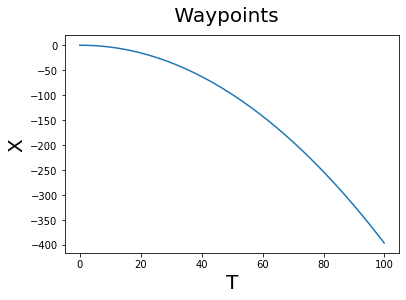

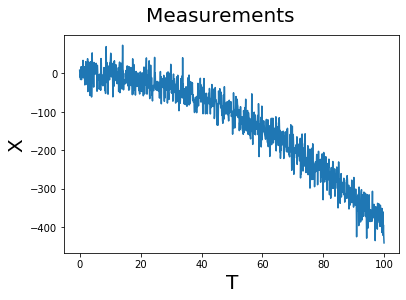

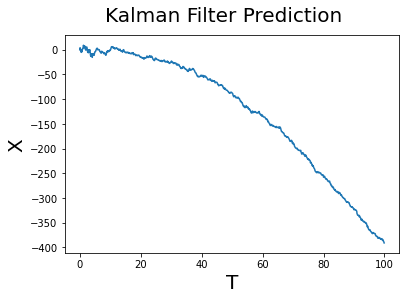

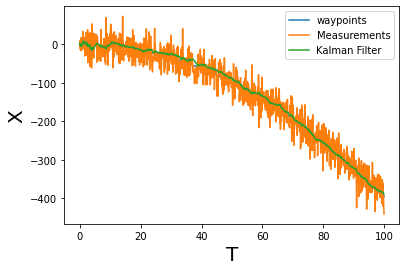

In [33]:
def main():
    dt = 0.10
    
    t =np.arange(0, 100, dt)
    
    # create Waypoints 
    waypoints = 0.01*(3*t - 4*t**2)
    
    # acceleration is set to 0.08 m/s^2
    a= 0.08
    
    # we assume that the standard deviation of the acceleration is 1.9 (m/s^2)
    sd_a = 0.1   
    
    # and standard deviation of the measurement is 1.2 (m)
    sd_m = 1.2  
    
    # create KalmanFilter object
    
    kf = KalmanFilterClass(dt, a, sd_a, sd_m)
    
    prediction_points = []
    
    measurement_points = []
    
    for x in waypoints:
        
        # Mesurement is given as waypoint + normal error in the range(0,50)
        z = kf.H * x + np.random.normal(0, 25)
        
        # Append measurements
        measurement_points.append(z.item(0))
        
        # Call predict() to predict the next state and append the output
        prediction_points.append(kf.predict()[0])
        
        # Update to take in the measurement to update the parameters
        kf.update(z.item(0))
        
    fig = plt.figure()
    fig.suptitle(' Waypoints ', fontsize=20)
    
    plt.plot(t, np.array(waypoints), label='waypoints')
    plt.xlabel('T', fontsize=20)
    plt.ylabel('X', fontsize=20)
    plt.show()
    fig = plt.figure()
    fig.suptitle('Measurements  ', fontsize=20)
    plt.plot(t, measurement_points, label='Measurements')
    plt.xlabel('T', fontsize=20)
    plt.ylabel('X', fontsize=20)
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('Kalman Filter Prediction ', fontsize=20)
    plt.plot(t, np.squeeze(prediction_points), label='Kalman Filter ')
    plt.xlabel('T', fontsize=20)
    plt.ylabel('X', fontsize=20)
    plt.show()
    
    fig = plt.figure()
    fig.suptitle('', fontsize=20)
    plt.plot(t, np.array(waypoints), label='waypoints')
    plt.plot(t, measurement_points, label='Measurements')
    plt.plot(t, np.squeeze(prediction_points), label='Kalman Filter ')
    plt.xlabel('T', fontsize=20)
    plt.ylabel('X', fontsize=20)
    plt.legend()
    plt.show()
    
    
if __name__ == "__main__":
    main()
    
    
    

# Kalman Filter Equations for 2D tracking
 
<br>
<font size="4">
The basic equations should remain the same as the 1D case with additional considerations for the other variable.
Considering $X$ and $Y$ to be the concerned variables denoting the position the state vector should look like
    
$$\bf{X_t}=\begin{bmatrix} X_t \\ Y_t \\\dot{X_t}\\ \dot{Y_t}\end{bmatrix}$$
    
And by extension the can be related to the previous state vector as follows
    
$$\bf{X_t}=\begin{bmatrix} X_t \\ Y_t \\\dot{X_t}\\ \dot{Y_t}\end{bmatrix}= \begin{bmatrix} X_{t-1} + \dot{X_{t-1}}\Delta t + \frac{1}{2}\dot{\dot{X_t}}{\Delta t}^2 \\  Y_{t-1} + \dot{Y_{t-1}}\Delta t + \frac{1}{2}\dot{\dot{Y_t}}{\Delta t}^2 \\ \dot{X_{t-1}} + \dot{\dot{X_{t-1}}}\Delta t \\ \dot{Y_{t-1}} + \dot{\dot{Y_{t-1}}}\Delta t \end{bmatrix} $$

This can be rewritten as

$$\bf{X_t}=\begin{bmatrix} X_t \\ Y_t \\\dot{X_t}\\ \dot{Y_t}\end{bmatrix}= \begin{bmatrix} 1 & 0 &\Delta t & 0\\ 0 & 1 & 0 &\Delta t \\ 0 &0 &1 &0 \\ 0 & 0  & 0 & 1\end{bmatrix} \begin{bmatrix} X_{t-1} \\ Y_{t-1}\\\dot{X_{t-1}}\\\dot{Y_{t-1}}\end{bmatrix} + \begin{bmatrix}\frac{1}{2}{\Delta t}^2 & 0 \\0 & \frac{1}{2}{\Delta t}^2 \\ \Delta t & 0 \\0 & \Delta t \end{bmatrix} \begin{bmatrix}\dot{\dot{X_{t-1}}}\\\dot{\dot{Y_{t-1}}}\end{bmatrix} $$

Which gives 
    
$$ A =\begin{bmatrix} 1 & 0 &\Delta t & 0\\ 0 & 1 & 0 &\Delta t \\ 0 &0 &1 &0 \\ 0 & 0  & 0 & 1\end{bmatrix} ;B=\begin{bmatrix}\frac{1}{2}{\Delta t}^2 & 0 \\0 & \frac{1}{2}{\Delta t}^2 \\ \Delta t & 0 \\0 & \Delta t \end{bmatrix} $$ 
    
Since We're considering the case where velocity isn't being measured the $H$ matrix will look like
    
$$H = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 &0& 0 \end{bmatrix} $$

    
Also Process noise covariance Q and Measurement noise covariance R will look like 
    
$$Q=\begin{bmatrix} {\sigma_x}^2 & 0 &\sigma_x\sigma_{\dot{x}}& 0\\0& {\sigma_y}^2 & 0 &\sigma_y\sigma_{\dot{y}}\\\sigma_x\sigma_{\dot{x}} &  0 &\sigma_{\dot{x}}^2 & 0\\ 0&\sigma_y\sigma_{\dot{y}} &  0 &\sigma_{\dot{y}}^2 \end{bmatrix}$$
    
This is merely an extension of the 1D Q matrix where 0 is added in places where an x variable and y variable intersect as they are independednt of each other
    
Now extending the same logic as last time 

$$ \sigma_x = \frac{\Delta t^2}{2} \sigma_{\dot{\dot{x}}}$$
$$ \sigma_{\dot{x}} = \Delta t \sigma_{\dot{\dot{x}}}$$
    
Thus 
$$ Q=\begin{bmatrix} \frac{\Delta t^4}{4} & 0 &\frac{\Delta t^3}{2}& 0\\ 0 & \frac{\Delta t^4}{4} & 0 &\frac{\Delta t^3}{2}\\\frac{\Delta t^3}{2} &0  &\Delta t^2 & 0 \\ 0& \frac{\Delta t^3}{2} &0  &\Delta t^2 \end{bmatrix} \sigma_{\dot{\dot{x}}}^2
$$
Here the same process noise is considered for x and y.
    
The measurement noise R extends itself to 2D

$$R = \begin{bmatrix}\sigma_x^2 & 0 \\ 0 &\sigma_y^2\end{bmatrix}$$
    
Q and R are essential for correct updation of the error covariance matrix $P_t$
</font>


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilterClass2D(object):
    
    def __init__(self, dt, a_x, a_y, sd_acceleration, x_sd, y_sd):
        
        self.dt = dt

        # the acceleration which is essentially u from the state update equation 
        self.a = np.matrix([[a_x],[a_y]])

        

        #  The state transition matrix 
        self.A = np.matrix([[1, 0, self.dt, 0],[0, 1, 0, self.dt],[0, 0, 1, 0],[0, 0, 0, 1]])

        # The control input transition matrix 
        self.B = np.matrix([[(self.dt**2)/2, 0],[0,(self.dt**2)/2],[self.dt,0],[0,self.dt]])

        # The matrix that maps state vector to measurement 
        self.H = np.matrix([[1, 0, 0, 0],[0, 1, 0, 0]])

        # Processs Covariance that for our case depends solely on the acceleration  
        self.Q = np.matrix([[(self.dt**4)/4, 0, (self.dt**3)/2, 0],[0, (self.dt**4)/4, 0, (self.dt**3)/2],
                            [(self.dt**3)/2, 0, self.dt**2, 0],[0, (self.dt**3)/2, 0, self.dt**2]]) * sd_acceleration**2

        # Measurement Covariance
        self.R = np.matrix([[x_sd**2,0],
                           [0, y_sd**2]])

        # The error covariance matrix that is Identity for now. It gets updated based on Q, A and R.
        self.P = np.eye(self.A.shape[1])
        
        #  Finally the vector in consideration ; it's [ x position ;  y position ; x velocity ; y velocity ; ]
        self.x = np.matrix([[0], [0], [0], [0]])

    def predict(self):

        # The state update : X_t = A*X_t-1 + B*u 
        # here u is acceleration,a 
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.a)
        
        # Updation of the error covariance matrix 
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x[0:2]

    def update(self, z):


        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R

 
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S)) 
    
        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))  

        I = np.eye(self.H.shape[1])

        self.P = (I -(K*self.H))*self.P  
        
        return self.x[0:2]

# Detection Pipeline
![](detect.png)
<br>

<font size="4">

We use basic blob detection to find the circles in the video on which we will test the 2D filter. 
    
The exact steps involved in the preprocessing can be understood from the diagram 
    
</font>

In [3]:
import numpy as np
import cv2

def calc_centroid(image,thresh):
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        centroids = []
        blob_thresh = 4
        for i in contours:
            try:
                (x, y), r = cv2.minEnclosingCircle(i)
                centeroid = (int(x), int(y))
                r = int(r)
                if (r > blob_thresh):
                    cv2.circle(image, centeroid, r, (0, 0, 255), 2)
                    coords = np.array([[x], [y]])
                    centroids.append(np.round(coords))
            except ZeroDivisionError:
                pass
        return centroids

class Detect(object):
    def __init__(self):
        self.bgd = cv2.createBackgroundSubtractorMOG2()

    def get_centroid(self, image):
        g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        try:
            cv2.imshow('Gray Scaled', g)
        except:
            print("End")

        f = self.bgd.apply(g)
        e = cv2.Canny(f, 50, 190, 3)
        _, thresh = cv2.threshold(e, 127, 255, 0)
        return calc_centroid(image, thresh)

# Testing the 2D Kalman Filter for a single object 

<br>

<font size="4">

The Kalman Filter is put to test by running the detection and Kalman Filter code to detect a single object in a video. 
    
</font>

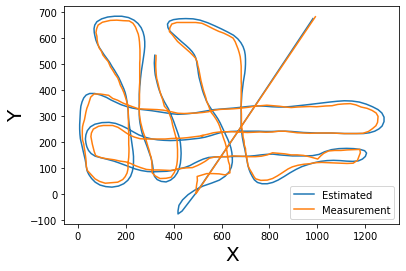

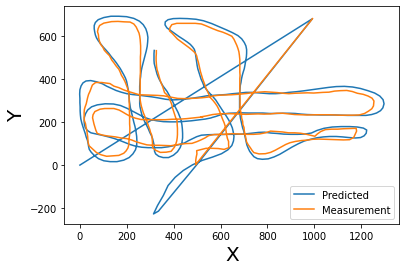

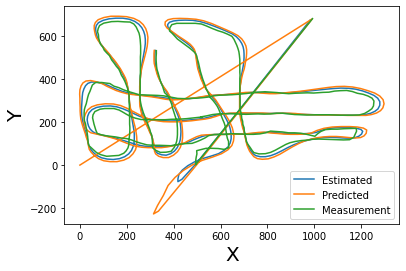

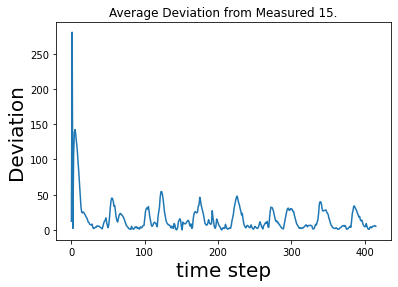

In [7]:

def main():
    
    
    # dt, a_x, a_y, sd_acceleration, x_sd, y_sd
    KF = KalmanFilterClass2D(0.1, 1, 1, 1, 0.1,0.1)

    Video = cv2.VideoCapture('42.mp4')
    
    detection = Detect()
    
    E=[]
    t=[]
    G=[[] , [] , [] , [], [], []]
    X=[[]]
    i=0
    
    writer=None
    
    while(True):
        
        ret, frame = Video.read()
        if not ret:
            break
        
        centers = detection.get_centroid(frame)
        
        (x, y) = KF.predict()
        X.append([x,y])
        
        if (len(centers) > 0):
            
            
            cv2.circle(frame, (int(centers[0][0]), int(centers[0][1])), 10, (0, 191, 255), 2)
            
            
            x,y=int(x),int(y)
            G[4].append(x)
            G[5].append(y)
     
            (x1, y1) = KF.update(centers[0])
            
            
            x1=int(x1)
            y1=int(y1)
            G[0].append(x1)
            G[1].append(y1)
            x,y=int(x),int(y)
            
            G[2].append(int(centers[0][0]))
            G[3].append(int(centers[0][1]))
            E.append(((int(centers[0][0])-x1)**2 + (int(centers[0][1])-y1)**2)**0.5)
            t.append(i)
            cv2.rectangle(frame, (x1 - 14, y1 - 14), (x1 + 14, y1 + 14), (255, 0, 0), 2)
            cv2.putText(frame, "Estimated Position", (x1 + 14, y1 + 9), 0, 0.5, (0, 100, 255), 2)

            cv2.putText(frame, "Measured Position", (int(centers[0][0]) + 15, int(centers[0][1]) - 15), 0, 0.5, (0,255,100), 2)
        if i>3:
            cv2.line(frame, (int(X[i][0]), int(X[i][1])), (int(X[i-3][0]), int(X[i-3][1])),(0,0,255), 2)
        i+=1
        
        cv2.imshow('image', frame)
        
        if writer is None:
            writer = cv2.VideoWriter('./output6.avi', cv2.VideoWriter_fourcc(*"MJPG") , 30, (frame.shape[1], frame.shape[0]), True)
        writer.write(frame)
        
        cv2.waitKey(70)
    Video.release()
    cv2.destroyAllWindows()
  
    plt.plot(G[0],G[1],label='Estimated')
    plt.plot(G[2],G[3],label='Measurement')
    
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.legend()
    plt.show()
    
    plt.plot(G[4],G[5],label='Predicted')
    plt.plot(G[2],G[3],label='Measurement')
    
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.legend()
    plt.show()
    
    plt.plot(G[0],G[1],label='Estimated')
    plt.plot(G[4],G[5],label='Predicted')
    plt.plot(G[2],G[3],label='Measurement')
    
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.legend()
    plt.show()
    
    plt.plot(t,E)
    S= str(sum(E)/len(E))
    plt.title("Average Deviation from Measured "+ S[:3])
    plt.ylabel('Deviation', fontsize=20)
    plt.xlabel('time step', fontsize=20)
    plt.show()
    
if __name__ == "__main__":
    main()

# Problem with Multiple Object tracking 

<br>

## Detection doesn't track the object 


<br>

<font size="4">

Whenver we try to detect multiple objects in a frame the corresponding image processing algorithm treats each frame like a separate problem and outputs the centroids in the order the objects are detected. Since this assumes no previous knowlegde of the object's position , the centroids returned need to be mapped to the correct object.  
    
</font>

## Solution to the problem 


<br>

<font size="4">

To solve this problem we need to assign an ID to each object once it is detected. Having done that the next problem is to correctly assign the IDs to the objects detected in the next frame. To solve that we need to model this as an assignment problem. 
    
This picture shows a bipartite graphs where vertices represent objects with their (x,y) co-ordinates. The edges represent the possible matchings. The edges have a cost which is the euclidian distance between the two co-ordinates / vertices. 
    
The objects on the left are from a previous detection and the objects on the right are the current detections.

    
The minimum weight/cost matching will allow us to correctly ID the objects from left to right.

 
    
</font>

![](bipartite.png)


## Greedy Solution 

<br>

<font size="4">

The greedy solution to the problem is to check the min dist cost match among all the possible matchings object and then assign the ID.
Considering there are N object IDs and N detections the number of iterations are 
    
$$Iterations = N(N-1)(N-2) ....... 1$$

Thus the complexity becomes 

$$Complexity = O(N(N-1)(N-2) ....... 1) = O(N!)$$
    
This is highly undesirable as the assignment needs to be done for every frame. Thereby rendering it very computationally intensive. 
    
</font>



# The Hungarian Algorithm 


<br>
<font size="4">
The bipartite graph can be represnted as an adjacency matrix as shown
    
$$ Adjacency =\begin{bmatrix} dist_{11}  & dist_{12} & dist_{13} & .... & dist_{1M} \\ 
dist_{21}  & dist_{22} & dist_{23} & .... & dist_{2M}
\\.  & . & . & ..... & .
\\.  & . & . & ..... & .
\\.  & . & . & ..... & .
\\ dist_{N1}  & dist_{N2} & dist_{N3} & .... & dist_{NM}\end{bmatrix}
$$

Now the Hungarian Algorithm helps us arrive at the final optimal assignment using a few steps that involve row and column reduction on the adjacency matrix. 
    
The Hungarian Algorithm can be captured in the following steps
    




    
</font>



In [17]:
class Hungarian(object):

    def __init__(self, arr_costs):
        self.X = arr_costs.copy()

        n, m = self.X.shape
        self.u_row = np.ones(n, dtype=bool)
        self.u_column = np.ones(m, dtype=bool)
        self.r_0Z = 0
        self.c_0Z = 0
        self.course = np.zeros((n + m, 2), dtype=int)
        self.check = np.zeros((n, m), dtype=int)

    def clear(self):
        self.u_row[:] = True
        self.u_column[:] = True

### Step 1
  <br>
<font size="4">  
Find the smallest element in each row and subtract every elemnt in that row with that element.
    
</font>

In [18]:
def row_reduction(assignment):
    assignment.X -= assignment.X.min(axis=1)[:, np.newaxis]
    for i, j in zip(*np.where(assignment.X == 0)):
        if assignment.u_column[j] and assignment.u_row[i]:
            assignment.check[i, j] = 1
            assignment.u_column[j] = False
            assignment.u_row[i] = False

    assignment.clear()
    return cover_columns

### Step 2

  <br>
<font size="4"> 

Draw lines so that all the zeros are covered with minimal number of lines
    
    
</font>

In [19]:
def cover_columns(assignment):
    check = (assignment.check == 1)
    assignment.u_column[np.any(check, axis=0)] = False

    if check.sum() < assignment.X.shape[0]:
        return cover_zeros

### Step 3
    
  <br>
<font size="4"> 
If number of line is N then algorithm is done and all we need to do is generate assignments based on the zero elements.

    
</font>

In [20]:
def cover_zeros(assignment):
    X = (assignment.X == 0).astype(int)
    covered = X * assignment.u_row[:, np.newaxis]
    covered *= np.asarray(assignment.u_column, dtype=int)
    n = assignment.X.shape[0]
    m = assignment.X.shape[1]

    while True:
        row, col = np.unravel_index(np.argmax(covered), (n, m))   
        if covered[row, col] == 0:
            return generate_zeros
        else:
            assignment.check[row, col] = 2
            star_col = np.argmax(assignment.check[row] == 1)
            if assignment.check[row, star_col] != 1:
                assignment.r_0Z = row
                assignment.c_0Z = col
                count = 0
                course = assignment.course
                course[count, 0] = assignment.r_0Z
                course[count, 1] = assignment.c_0Z

                while True:
                    row = np.argmax(assignment.check[:, course[count, 1]] == 1)
                    if assignment.check[row, course[count, 1]] != 1:
                        break
                    else:
                        count += 1
                        course[count, 0] = row
                        course[count, 1] = course[count - 1, 1]

                    col = np.argmax(assignment.check[course[count, 0]] == 2)
                    if assignment.check[row, col] != 2:
                        col = -1
                    count += 1
                    course[count, 0] = course[count - 1, 0]
                    course[count, 1] = col

                for i in range(count + 1):
                    if assignment.check[course[i, 0], course[i, 1]] == 1:
                        assignment.check[course[i, 0], course[i, 1]] = 0
                    else:
                        assignment.check[course[i, 0], course[i, 1]] = 1

                assignment.clear()
                assignment.check[assignment.check == 2] = 0
                return cover_columns
            else:
                col = star_col
                assignment.u_row[row] = False
                assignment.u_column[col] = True
                covered[:, col] = X[:, col] * (
                    np.asarray(assignment.u_row, dtype=int))
                covered[row] = 0

### Step 4
    
  <br>
<font size="4"> 
Find the smallest entry not covered by any line. Now subtract this from every uncovered algorithm and add it to the  elements that have the horizontal and vertical lines cross each other. Now try from step 3 again.

    
</font>

In [21]:
def generate_zeros(assignment):
    if np.any(assignment.u_row) and np.any(assignment.u_column):
        minimum_value = np.min(assignment.X[assignment.u_row], axis=0)
        minimum_value = np.min(minimum_value[assignment.u_column])
        assignment.X[~assignment.u_row] += minimum_value
        assignment.X[:, assignment.u_column] -= minimum_value
    return cover_zeros

## Main function for assignment 

In [22]:
def get_minimum_cost_assignment(arr_costs):
    arr_costs = np.asarray(arr_costs)

    
    if arr_costs.shape[1] < arr_costs.shape[0]:
        arr_costs = arr_costs.T
        is_T = True
    else:
        is_T = False

    assignment = Hungarian(arr_costs)

   
    run = None if 0 in arr_costs.shape else row_reduction

    while run is not None:
        run = run(assignment)

    if is_T:
        check = assignment.check.T
    else:
        check = assignment.check
    return np.where(check == 1)

## ObjectTracker 

  <br>
<font size="4"> 
Code that instantiates every detcted object and keeps track of it's ID , position and other relevant information.
Each object has a Kalman Filter object that helps the Hungarian algorithm  assign effectively.
 '   
</font>

In [23]:
class Object(object):

    def __init__(self, detect , ID):
        
        self.prediction = np.asarray(detect)
        self.object_id = ID 
        self.KF = KalmanFilterClass2D(0.1, 1, 1, 1, 0.1,0.1)
        self.skip_count = 0 
        self.line = [] 
        
class ObjectTracker(object):

    def __init__(self, min_dist , max_skip ,line_length , object_id):
    
        self.min_dist  = min_dist 
        
        self.max_skip = max_skip
        
        self.line_length = line_length
        
        self.objects = []
        
        self.object_id = object_id

    def Update(self, detections):

        if self.objects ==[]:
            
            for i in range(len(detections)):
                
                self.objects.append( Object(detections[i], self.object_id) )
                
                self.object_id += 1
                
        N , M = len(self.objects), len(detections)
        
        cost_matrix = np.zeros(shape=(N, M)) 
        
        for i in range(N):
            
            for j in range(M):
                
                diff = self.objects[i].prediction - detections[j]
                
                cost_matrix[i][j] = np.sqrt(diff[0][0]*diff[0][0] +diff[1][0]*diff[1][0])

        cost_matrix = (0.5) * cost_matrix 

        assign = []
        for _ in range(N):
            assign.append(-1)
            
        rows, cols = get_minimum_cost_assignment(cost_matrix)
        
        for i in range(len(rows)):
            assign[rows[i]] = cols[i]

        unassign = []
        
        for i in range(len(assign)):
            
            if (assign[i] != -1):
                
                if (cost_matrix[i][assign[i]] > self.min_dist):
                    
                    assign[i] = -1
                    unassign.append(i)
            else:
                self.objects[i].skip_count += 1

        del_objects = []
        for i in range(len(self.objects)):
            if (self.objects[i].skip_count > self.max_skip):
                del_objects.append(i)
        if len(del_objects) > 0: 
            for id in del_objects:
                if id < len(self.objects):
                    del self.objects[id]
                    del assign[id]         

        for i in range(len(detections)):
                if i not in assign:
                    self.objects.append( Object( detections[i], self.object_id )  )
                    self.object_id += 1


                
        for i in range(len(assign)):
            self.objects[i].KF.predict()

            if(assign[i] != -1):
                self.objects[i].skip_count = 0
                self.objects[i].prediction = self.objects[i].KF.update( detections[assign[i]])
            else:
                self.objects[i].prediction = self.objects[i].KF.update( np.array([[0], [0]]))

            if(len(self.objects[i].line) > self.line_length):
                for j in range( len(self.objects[i].line) - self.line_length):
                    del self.objects[i].line[j]

            self.objects[i].line.append(self.objects[i].prediction)
            self.objects[i].KF.lastResult = self.objects[i].prediction


## Main Code

  <br>
<font size="4"> 
The Detector and ObjectTracker are called here to detect objects in the video input. The code can be understood using this diagram.
</font>

![](MAIN.png)

In [11]:
import copy

def draw_line(tracker,image):
    for i in range(len(tracker.objects)):
        if (len(tracker.objects[i].line) > 1):
            for j in range(len(tracker.objects[i].line)-1):
                x1 = tracker.objects[i].line[j][0][0]
                y1 = tracker.objects[i].line[j][1][0]
                x2 = tracker.objects[i].line[j+1][0][0]
                y2 = tracker.objects[i].line[j+1][1][0]
                clr = tracker.objects[i].object_id
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)),(0,0,0), 2)
            cv2.putText(image,str(clr), (int(x1)-10,int(y1)-20),0, 0.5, (0,0,0),2)

def save_video(writer,image):
    if writer is None:
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter('./output5.avi', fourcc, 30, (image.shape[1], image.shape[0]), True)
    writer.write(image)
            
if __name__ == "__main__":
    
    video = cv2.VideoCapture('11.avi')

    detect_object = Detect()

    tracker = ObjectTracker(160, 8, 3, 1)


    writer=None
    
    while(True):
        ret, image = video.read()

        original_video = copy.copy(image)
        
        if not ret:
            break
            
        centroids = detect_object.get_centroid(image)

        if (len(centroids) > 0):

            tracker.Update(centroids)
            
            draw_line(tracker,image)

            cv2.imshow('Tracking', image)

            save_video(writer,image)
            

        cv2.imshow('Original', original_video)

        cv2.waitKey(50)

    video.release()
    cv2.destroyAllWindows()

## Testing the Kalman Filter and the Hungarian algorithm on a real Video

  <br>
<font size="4"> 
We tested the above code on a real video. Since our detection code won't work on a real video we decided to use pre-trained weights and implemented a detection based on a DNN using opencv.
</font>

In [13]:
def draw_boxes(img, boxes, confidences, classids, idxs, labels):
    if len(idxs) > 0:
        for i in idxs.flatten():
            x, y = boxes[i][0], boxes[i][1]
            w, h = boxes[i][2], boxes[i][3]
    
            color = (255,0,0)


            cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    return img

In [14]:
def generate_boxes(outs, height, width, tconf,labels):
    boxes = []
    confidences = []
    classids = []
    center=[]

    for out in outs:
        for detection in out:
            scores = detection[5:]
            classid = np.argmax(scores)
            confidence = scores[classid]
            
            if confidence > tconf and labels[classid]=='person':

                box = detection[0:4] * np.array([width, height, width, height])
                centerX, centerY, bwidth, bheight = box.astype('int')


                x = int(centerX - (bwidth / 2))
                y = int(centerY - (bheight / 2))


                boxes.append([x, y, int(bwidth), int(bheight)])
                center.append(np.array([[x], [y]]))
                confidences.append(float(confidence))
                classids.append(classid)

    return boxes, confidences, classids,center

In [15]:
def infer_image(net, layer_names, height, width, img, labels, boxes=None, confidences=None, classids=None, idxs=None):
    
    

    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)


    net.setInput(blob)
    outs = net.forward(layer_names)

    boxes, confidences, classids,center = generate_boxes(outs, height, width, 0.5,labels)


    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

    
        
    img = draw_boxes(img, boxes, confidences, classids, idxs, labels)

    return center

# Multiple Player Tracking on a Tennis video

In [ ]:
import copy

def main():
    
    cap = cv2.VideoCapture("123.mp4")

    tracker = ObjectTracker(160, 8, 3,1)
    
    labels = open('./yolov3-coco/coco-labels').read().strip().split('\n')
    net = cv2.dnn.readNetFromDarknet('./yolov3-coco/yolov3.cfg', './yolov3-coco/yolov3.weights')
    layer_names = net.getLayerNames()
    layer_names = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    height, width = None, None
    writer = None
    
    while(True):
        
        ret, frame = cap.read()
        if width is None or height is None:
            height, width = frame.shape[:2]

        orig_frame = copy.copy(frame)
        
        if not ret:
            break

        centers = infer_image(net, layer_names, height, width, frame, labels)
        
        if (len(centers) > 0):

            tracker.Update(centers)

            draw_line(tracker,frame)
            
            cv2.imshow('Tracking', frame)

            save_video(writer,frame)

        cv2.imshow('Original', orig_frame)

        cv2.waitKey(50)


    writer.release()
    cap.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":

    main()